### Package imports

In [ ]:
import numpy as np
import numpy.linalg as LA
import matplotlib
from matplotlib import pyplot as plt
import random

%matplotlib inline

### Data generation
* From two different multivariate normal distributions, where it is visible that the two groups can be separated

In [217]:
x = np.random.multivariate_normal((1, 1), [[0.3, 0], [0, 0.3]], 200)
x = np.concatenate((x, np.random.multivariate_normal((-1, -1), [[0.3, 0], [0, 0.3]], 200)), axis=0)

### First visualization (data only)

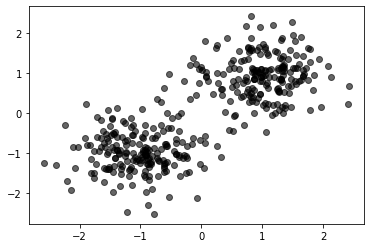

In [218]:
plt.scatter(x[:, 0], x[:, 1], c='black', alpha=0.6)
plt.show()

### $\boldsymbol{\mu}$ setting
* Notice that we have intentionally set the $\mu$ vectorr at a distance from the data clusters

In [219]:
mu_1, mu_2 = np.array([-2, 2]), np.array([1.5, -3])

### Second visualization (data and the mean vectors)

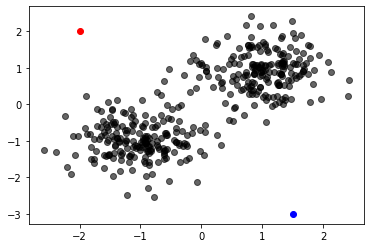

In [220]:
plt.scatter(x[:, 0], x[:, 1], c='black', alpha=0.6)
plt.scatter(mu_1[0], mu_1[1], c='red')
plt.scatter(mu_2[0], mu_2[1], c='blue')
plt.show()

In [221]:
mu_1_old, mu_2_old = np.array([float("inf"), float("inf")]), np.array([float("inf"), float("inf")])
c = np.array([None for _ in range(200)])

### Training
* The updates are made as follows:
  
  1. Random initialization of **cluster centroids** $\boldsymbol{\mu_1}$ and $\boldsymbol{\mu_2}$
  2. For data $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \cdots, \mathbf{x}_n]$, Repeat until convergence:
      $$ \forall i \in [0, n] \quad \mathbf{c}_i \leftarrow \text{argmin}_{j} ||\mathbf{x}_i - \boldsymbol{\mu}_j ||_2$$
      $$ \forall j \in \{0, 1\} \quad \mathbf{\mu_j} \leftarrow \dfrac{\sum_{i} \mathbb{1}\{\mathbf{c}_i = j\}\mathbf{x}_i}{\sum_{i} \mathbb{1}\{\mathbf{c}_i = j\}}

In [222]:
while (abs(mu_1_old - mu_1) >= 1e-7).any() and (abs(mu_2_old - mu_2) >= 1e-7).any():

    norm_1 = LA.norm(x - mu_1, axis=1).reshape(1, -1)
    norm_2 = LA.norm(x - mu_2, axis=1).reshape(1, -1)
    c = np.concatenate((norm_1, norm_2), axis=0)
    c = np.argmin(c, axis=0).reshape(-1, 1)

    mu_1_temp = np.where(c == 0, x, 0)
    mu_2_temp = np.where(c == 1, x, 0)

    mu_1_old, mu_2_old = mu_1, mu_2
    
    mu_1 = np.sum(mu_1_temp, axis=0) / (np.sum(np.count_nonzero(mu_1_temp, axis=1)) // 2)
    mu_2 = np.sum(mu_2_temp, axis=0) / (np.sum(np.count_nonzero(mu_2_temp, axis=1)) // 2)

In [223]:
label = np.squeeze(c)
colors = ['red', 'blue']

### Final visualization (after training)

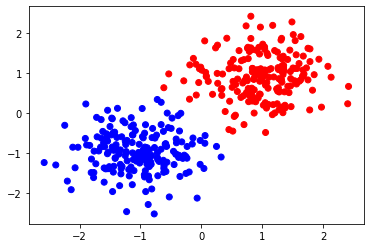

In [225]:
import matplotlib

plt.scatter(mu_1[0], mu_1[1], c='red')
plt.scatter(mu_2[0], mu_2[1], c='blue')
plt.scatter(x[:, 0], x[:, 1], c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()